In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

df=pd.read_csv ("data/DelayedFlights.csv")
df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [2]:
#Remove the column ' Unnamed: 0'
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  WeatherDelay      

In [4]:
df.isna().sum()

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

In [5]:
df[['CarrierDelay','WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']]=df[['CarrierDelay','WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']].fillna(0)
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,N,0,0.0,0.0,0.0,0.0,0.0
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,N,0,0.0,0.0,0.0,0.0,0.0
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,N,0,0.0,0.0,0.0,0.0,0.0
3,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,N,0,0.0,0.0,0.0,0.0,0.0


In [6]:
df["CancellationCode"].unique()

array(['N', 'A', 'B', 'C'], dtype=object)

In [8]:
df.dropna(inplace=True)
#Remove the column 'CancellationCode'
df.drop(['CancellationCode',"TailNum"], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1928368 entries, 0 to 1936757
Data columns (total 27 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  ActualElapsedTime  float64
 11  CRSElapsedTime     float64
 12  AirTime            float64
 13  ArrDelay           float64
 14  DepDelay           float64
 15  Origin             object 
 16  Dest               object 
 17  Distance           int64  
 18  TaxiIn             float64
 19  TaxiOut            float64
 20  Cancelled          int64  
 21  Diverted           int64  
 22  CarrierDelay       float64
 23  WeatherDelay       float64
 24  NASDelay           float64
 25  SecurityDelay     

In [9]:
from sklearn.model_selection import train_test_split

y = df['ArrDelay']
X = df.drop('ArrDelay',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print("number of test samples :", X_test.shape[0])
print("number of training samples:",X_train.shape[0])

number of test samples : 578511
number of training samples: 1349857


**Exercici 2**

Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...).

In [10]:
#MULTIconvert text data to numeric 
from sklearn import preprocessing
class MultiColumnLabelEncoder:

    def __init__(self, columns=None):
        self.columns = columns # array of column names to encode


    def fit(self, Xc, y=None):
        self.encoders = {}
        columns = Xc.columns if self.columns is None else self.columns
        for col in columns:
            self.encoders[col] = preprocessing.LabelEncoder().fit(Xc[col])
        return self


    def transform(self, Xc):
        output = Xc.copy()
        columns = Xc.columns if self.columns is None else self.columns
        for col in columns:
            output[col] = self.encoders[col].transform(Xc[col])
        return output


    def fit_transform(self, Xc, y=None):
        return self.fit(X,y).transform(Xc)


    def inverse_transform(self, Xc):
        output = Xc.copy()
        columns = Xc.columns if self.columns is None else self.columns
        for col in columns:
            output[col] = self.encoders[col].inverse_transform(Xc[col])
        return output

In [24]:
multi = MultiColumnLabelEncoder(columns=['UniqueCarrier','Origin', 'Dest'])

Xtrain = multi.fit_transform(X_train)
Xtest = multi.fit_transform(X_test)

In [25]:
Xtrain.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1349857.0,1.349857e+06,1.349857e+06,1.349857e+06,1.349857e+06,1.349857e+06,1.349857e+06,1.349857e+06,1.349857e+06,1.349857e+06,...,1.349857e+06,1.349857e+06,1.349857e+06,1349857.0,1349857.0,1.349857e+06,1.349857e+06,1.349857e+06,1.349857e+06,1.349857e+06
mean,2008.0,6.108840e+00,1.575192e+01,3.986050e+00,1.518880e+03,1.467845e+03,1.610427e+03,1.634303e+03,1.112278e+01,2.184372e+03,...,7.652297e+02,6.809648e+00,1.821843e+01,0.0,0.0,1.242753e+01,2.384149e+00,9.715452e+00,5.938777e-02,1.634672e+01
std,0.0,3.482568e+00,8.774658e+00,1.995664e+00,4.502536e+02,4.246432e+02,5.479742e+02,4.646268e+02,5.934918e+00,1.944590e+03,...,5.743377e+02,5.261032e+00,1.433047e+01,0.0,0.0,3.625385e+01,1.725764e+01,2.814140e+01,1.679296e+00,3.588524e+01
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,...,1.100000e+01,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,1.203000e+03,1.135000e+03,1.316000e+03,1.325000e+03,6.000000e+00,6.110000e+02,...,3.380000e+02,4.000000e+00,1.000000e+01,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.545000e+03,1.510000e+03,1.715000e+03,1.706000e+03,1.300000e+01,1.543000e+03,...,6.060000e+02,6.000000e+00,1.400000e+01,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.900000e+03,1.816000e+03,2.031000e+03,2.015000e+03,1.700000e+01,3.421000e+03,...,9.980000e+02,8.000000e+00,2.100000e+01,0.0,0.0,1.000000e+01,0.000000e+00,6.000000e+00,0.000000e+00,1.800000e+01
max,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.359000e+03,1.900000e+01,9.740000e+03,...,4.962000e+03,2.250000e+02,3.930000e+02,0.0,0.0,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(Xtrain))

StandardScaler()


In [27]:
print(scaler.mean_)

[2.00800000e+03 6.10883968e+00 1.57519167e+01 3.98604963e+00
 1.51887964e+03 1.46784470e+03 1.61042693e+03 1.63430321e+03
 1.11227849e+01 2.18437157e+03 1.33341695e+02 1.34223701e+02
 1.08313621e+02 4.30707186e+01 1.46487341e+02 1.49931297e+02
 7.65229750e+02 6.80964798e+00 1.82184254e+01 0.00000000e+00
 0.00000000e+00 1.24275342e+01 2.38414884e+00 9.71545208e+00
 5.93877722e-02 1.63467241e+01]


**Linear Regression**

In [33]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(Xtrain, y_train)


In [20]:
model

LinearRegression()

In [34]:
model.score(Xtrain, y_train)

0.9999999979321598

In [35]:
model.score(Xtest, y_test)

0.9999999983926317

In [32]:
Xtrain

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1520407,2008,9,10,3,1624.0,1450,1743.0,1616,5,687,...,853,6.0,22.0,0,0,0.0,0.0,0.0,0.0,87.0
655811,2008,4,10,4,1836.0,1825,2040.0,2033,7,4434,...,272,14.0,8.0,0,0,0.0,0.0,0.0,0.0,0.0
1688352,2008,11,14,5,1330.0,1220,1600.0,1349,7,5483,...,399,15.0,31.0,0,0,17.0,0.0,114.0,0.0,0.0
677029,2008,4,1,2,1146.0,1120,1407.0,1335,11,4448,...,323,6.0,18.0,0,0,19.0,0.0,6.0,0.0,7.0
478970,2008,3,19,3,1436.0,1250,1623.0,1358,7,4234,...,191,16.0,40.0,0,0,0.0,0.0,145.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152791,2008,1,28,1,1843.0,1605,2053.0,1815,1,1093,...,1120,12.0,16.0,0,0,0.0,0.0,158.0,0.0,0.0
966865,2008,6,24,2,2051.0,1850,50.0,2210,15,756,...,865,4.0,68.0,0,0,74.0,0.0,39.0,0.0,47.0
118288,2008,1,27,7,1926.0,1750,2052.0,1925,11,3449,...,540,3.0,15.0,0,0,0.0,13.0,0.0,0.0,74.0
1490085,2008,9,20,6,834.0,825,1053.0,935,11,3442,...,281,8.0,86.0,0,0,0.0,9.0,69.0,0.0,0.0


**Exercici 3**

Resumeix les noves columnes generades de manera estadística i gràfica

In [41]:
y_train

1520407     87.0
655811       7.0
1688352    131.0
677029      32.0
478970     145.0
           ...  
152791     158.0
966865     160.0
118288      87.0
1490085     78.0
306903      60.0
Name: ArrDelay, Length: 1349857, dtype: float64

In [42]:
res_df=pd.DataFrame()
res_df = pd.concat([y_train, Xtrain[['DepDelay', 'Distance', 'ArrTime', 'Origin', 'Dest']]], axis=1)
res_df.head()

,ArrDelay,DepDelay,Distance,ArrTime,Origin,Dest
1520407,87.0,94.0,853,1743.0,177,136
655811,7.0,11.0,272,2040.0,227,18
1688352,131.0,70.0,399,1600.0,203,18
677029,32.0,26.0,323,1407.0,210,160
478970,145.0,106.0,191,1623.0,50,18


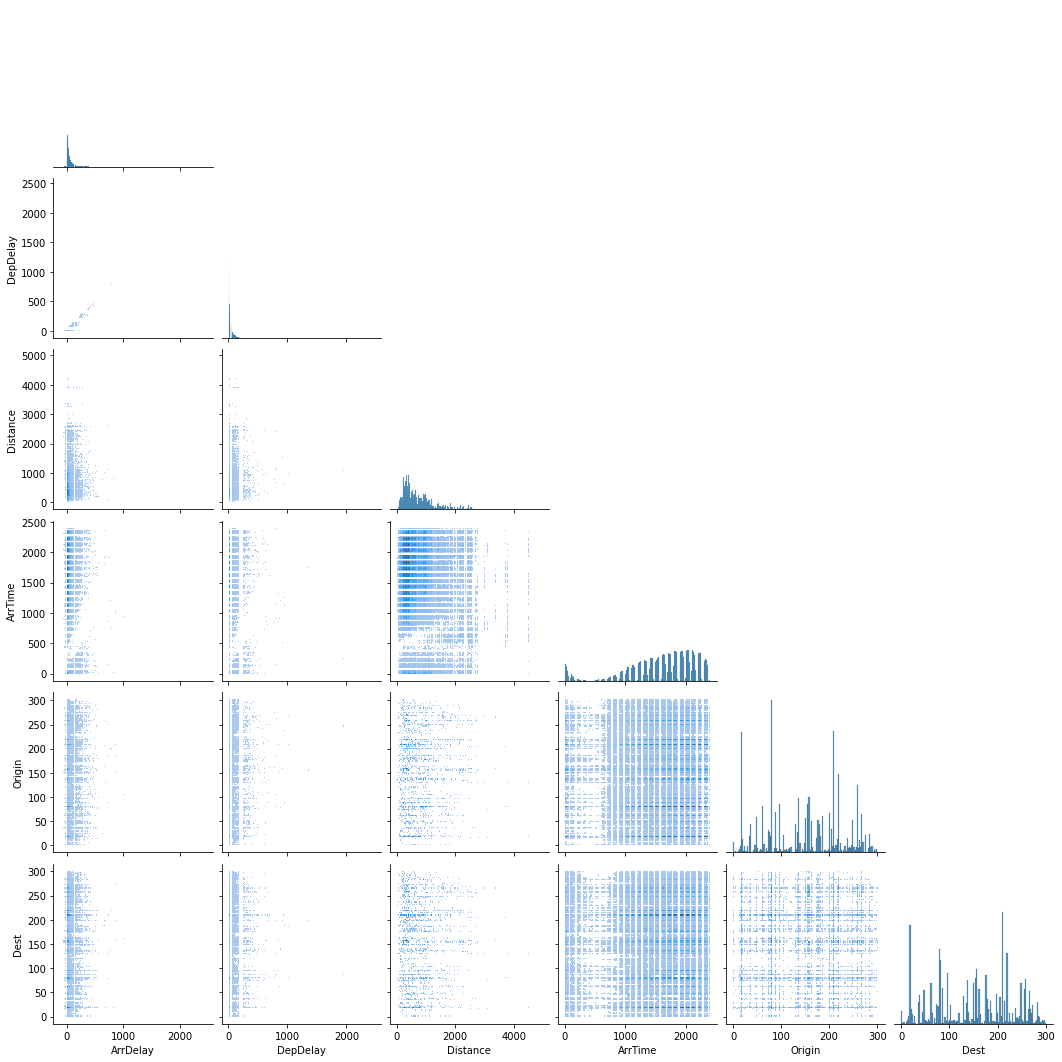

In [45]:
import seaborn as sns
sns.pairplot(res_df[['ArrDelay', 'DepDelay', 'Distance', 'ArrTime', 'Origin', 'Dest']], kind="hist", corner=True)

In [40]:
Xtest.describe().round(3)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,578511.0,578511.000,578511.000,578511.000,578511.000,578511.000,578511.000,578511.000,578511.000,578511.000,...,578511.000,578511.000,578511.000,578511.0,578511.0,578511.000,578511.000,578511.000,578511.000,578511.000
mean,2008.0,6.106,15.752,3.983,1518.106,1467.421,1609.810,1633.946,11.126,2184.107,...,764.294,6.815,18.215,0.0,0.0,12.360,2.423,9.723,0.056,16.406
std,0.0,3.477,8.781,1.997,450.860,424.927,548.064,464.633,5.930,1944.119,...,572.831,5.284,14.257,0.0,0.0,36.088,17.650,28.148,1.500,36.004
min,2008.0,1.000,1.000,1.000,1.000,0.000,1.000,0.000,0.000,1.000,...,30.000,0.000,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.000
25%,2008.0,3.000,8.000,2.000,1203.000,1135.000,1316.000,1325.000,6.000,610.000,...,338.000,4.000,10.000,0.0,0.0,0.000,0.000,0.000,0.000,0.000
50%,2008.0,6.000,16.000,4.000,1545.000,1510.000,1715.000,1705.000,13.000,1542.000,...,606.000,6.000,14.000,0.0,0.0,0.000,0.000,0.000,0.000,0.000
75%,2008.0,9.000,23.000,6.000,1900.000,1815.000,2030.000,2014.000,17.000,3429.000,...,997.000,8.000,21.000,0.0,0.0,10.000,0.000,6.000,0.000,18.000
max,2008.0,12.000,31.000,7.000,2400.000,2359.000,2400.000,2359.000,19.000,9741.000,...,4962.000,240.000,422.000,0.0,0.0,1552.000,1297.000,1207.000,229.000,1303.000
